# Applied Analytics Portfolio

**Predicting and Explaining Healthcare App Quality**

Group: `_1_`

Names & Student IDs: `Louis - `、`Christian - `、`Min Zhu - 5607778`

---

## 1. Introduction

Briefly describe the **decision context**:

- Mental health unit that wants to recommend high-quality healthcare apps.
- Patients have a range of mental illnesses and somatic comorbidities.

Explain **why prediction helps** and what the **overall goal** of this portfolio is:

- Use app metadata and user reviews to estimate whether an app is likely to be highly rated.
- Identify key factors that drive user-perceived app quality.

Conclude with a short **structure overview** of the notebook/report (what is done in Sections 2–5).

## 2. Data Understanding and Preparation

### 2.1 Research Goal and Operationalization
- Formulate a **precise prediction question**.
- Define what **"high-quality" / "highly rated"** means (e.g., rating threshold + minimum number of ratings).
- Specify which apps you will include (e.g., which categories, filters).

### 2.2 Data Overview

> We examined the App Store and found that most mental health apps fall under the categories `Gesundeit und Fitness` and `Medizin`, with some also in `Lifestyle`. So, we used SQL to filter the data: 
> WHERE category IN ('Medizin','Gesundheit und Fitness','Lifestyle').

- Number of apps and reviews after filtering.
    - apps: `46324` / 55485 (83%)
        - Medizin: `12947` (23%)
        - Gesundeit und Fitness: `29917`(23.9%)
        - lifestyle: `3460` (62%)
    - reviews: `443945` / 520353 (85%)
        - Medizin: `35472` (6.8%)
        - Gesundeit und Fitness: `390203` (74.9%)
        - lifestyle: `18270` (3.5%)
- Brief description of key variables (metadata and text).

In [20]:
# 2. Data Understanding and Preparation
# TODO: Load your datasets here and perform basic checks
import pandas as pd

# Merge on app_id and show
apps = pd.read_csv('datas/apple_apps_medizin.csv')
reviews = pd.read_csv('datas/app_reviews_medizin.csv')

df = reviews.merge(apps, on="app_id", how="left")
apps.head()

,app_id,link,app_name,developer_name,category,price,description,similar_apps,review_count,review_average,...,age,privacy_linked,privacy_unlinked,privacy_tracked,privacy_not_collected,version_history,in_app_purchases,privacy_policy_link,rank_from_pickle,privacy_not_collected_bool
0,1052453869,https://apps.apple.com/de/app/mach-mal-pause/i...,Mach mal Pause,Ingemar Bergmark,Gesundheit und Fitness,"3,99 €","Mach mal Pause dient dazu, die negativen Auswi...",[],0,0.00,...,9.134247,NaN,NaN,NaN,True,"[{""versionDisplay"": ""1.3"", ""releaseNotes"": ""* ...",[],https://swipeware.com/privacy-policy,NaN,True
1,1078072349,https://apps.apple.com/de/app/mediwidget-medic...,MediWidget: Medical ID Widgets,Adam Foot,Medizin,"2,99 €",MediWidget brings a Medical ID to your Home Sc...,"[""https://apps.apple.com/de/app/medical-id-rec...",0,0.00,...,5.942466,NaN,NaN,NaN,True,"[{""versionDisplay"": ""7.2.1"", ""releaseNotes"": ""...",[],https://adamfoot.dev/privacy-policy,NaN,True
2,1095275702,https://apps.apple.com/de/app/thoughts-a-medit...,Thoughts: A Meditation Tool,CARPATHCODE SRL,Gesundheit und Fitness,"0,00 €",Thoughts is an application designed to help yo...,[],0,0.00,...,8.769863,NaN,NaN,NaN,NaN,"[{""versionDisplay"": ""1.0"", ""releaseNotes"": ""Th...",[],NaN,NaN,False
3,1099627764,https://apps.apple.com/de/app/ketogenic-diet-r...,Ketogenic Diet Recipes,ANTHONY PETER WALSH,Gesundheit und Fitness,"5,99 €",Discover the Ketogenic Diet and find out how i...,[],0,0.00,...,8.742466,NaN,NaN,NaN,NaN,"[{""versionDisplay"": ""4.1.1"", ""releaseNotes"": ""...",[],NaN,NaN,False
4,1120175092,https://apps.apple.com/de/app/md-management-ca...,MD Management CarePad,MEDIFOX DAN GmbH,Medizin,"0,00 €",Das MediFox CarePad\nDas fortschrittlichste Un...,"[""https://apps.apple.com/de/app/clouddoku/id14...",25,2.72,...,4.868493,"[""Diagnose""]",NaN,NaN,NaN,"[{""versionDisplay"": ""4.15.11"", ""releaseNotes"":...",[],https://www.medifox.de/datenschutz/,NaN,False


### 2.3 Cleaning and Filtering
- Handle outliers (e.g., extreme prices, extremely low number of ratings).
    - 0 <= `review_average`, `rating` <= 5
    - `review_one`,`review_two`,`review_there`,`review_four`, `review_five`: int & >=0
    - `size`,`price` >= 0
- Check missing values in important variables and decide on imputation vs. dropping.
    - keep: because they carry meaningful information.
        - `iphone_version`、`ipad_version`、`ipod_version`、`mac_version`
        - `privacy_linked`、`privacy_unlinked`、`privacy_tracked`、`privacy_policy_link`
        - `rank_from_pickle`
    - imputation:
        - `privacy_not_collected_boolean`: base on `privacy_not_collected`  (`text => boolean`)
        - `price_eur`: base on `price` (`text => float`)
    - dropping: 
        - Apps data without comments. (35578 data)
        - `review`: The content contains only `None` or `null`. (3 data)
- Document inclusion criteria and any comparator groups (e.g., medical vs. non-medical apps). `⭐️ Todo`

In [21]:
# check missing values: NULL
df.isna().sum()

review_id                          0
app_id                             0
date                               0
developerresponse             356244
review                             3
rating                             0
isedited                           0
username                           0
title                              0
link                               0
app_name                           0
developer_name                     0
category                           0
price                              0
description                        0
similar_apps                       0
review_count                       0
review_average                     0
review_one                         0
review_two                         0
review_three                       0
review_four                        0
review_five                        0
iphone_version                  1107
ipad_version                  167143
ipod_version                  108528
mac_version                   285936
s

> 3 review data want to change: 'None' | 'null' => ' '

![](https://cdn.jsdelivr.net/gh/Miles-Zhu/bucket@main/imgs/20251213134607735.png)

In [ ]:
# check missing data: 0
# keep: all missing data is `int | boolean`
(df == 0).sum()

review_id                          0
app_id                             0
date                               0
developerresponse                  0
review                             0
rating                             0
isedited                      435896
username                           0
title                              0
link                               0
app_name                           0
developer_name                     0
category                           0
price                              0
description                        0
similar_apps                       0
review_count                     790
review_average                   790
review_one                      7891
review_two                     17081
review_three                   12777
review_four                     8801
review_five                     2683
iphone_version                     0
ipad_version                       0
ipod_version                       0
mac_version                        0
s

In [ ]:
# check

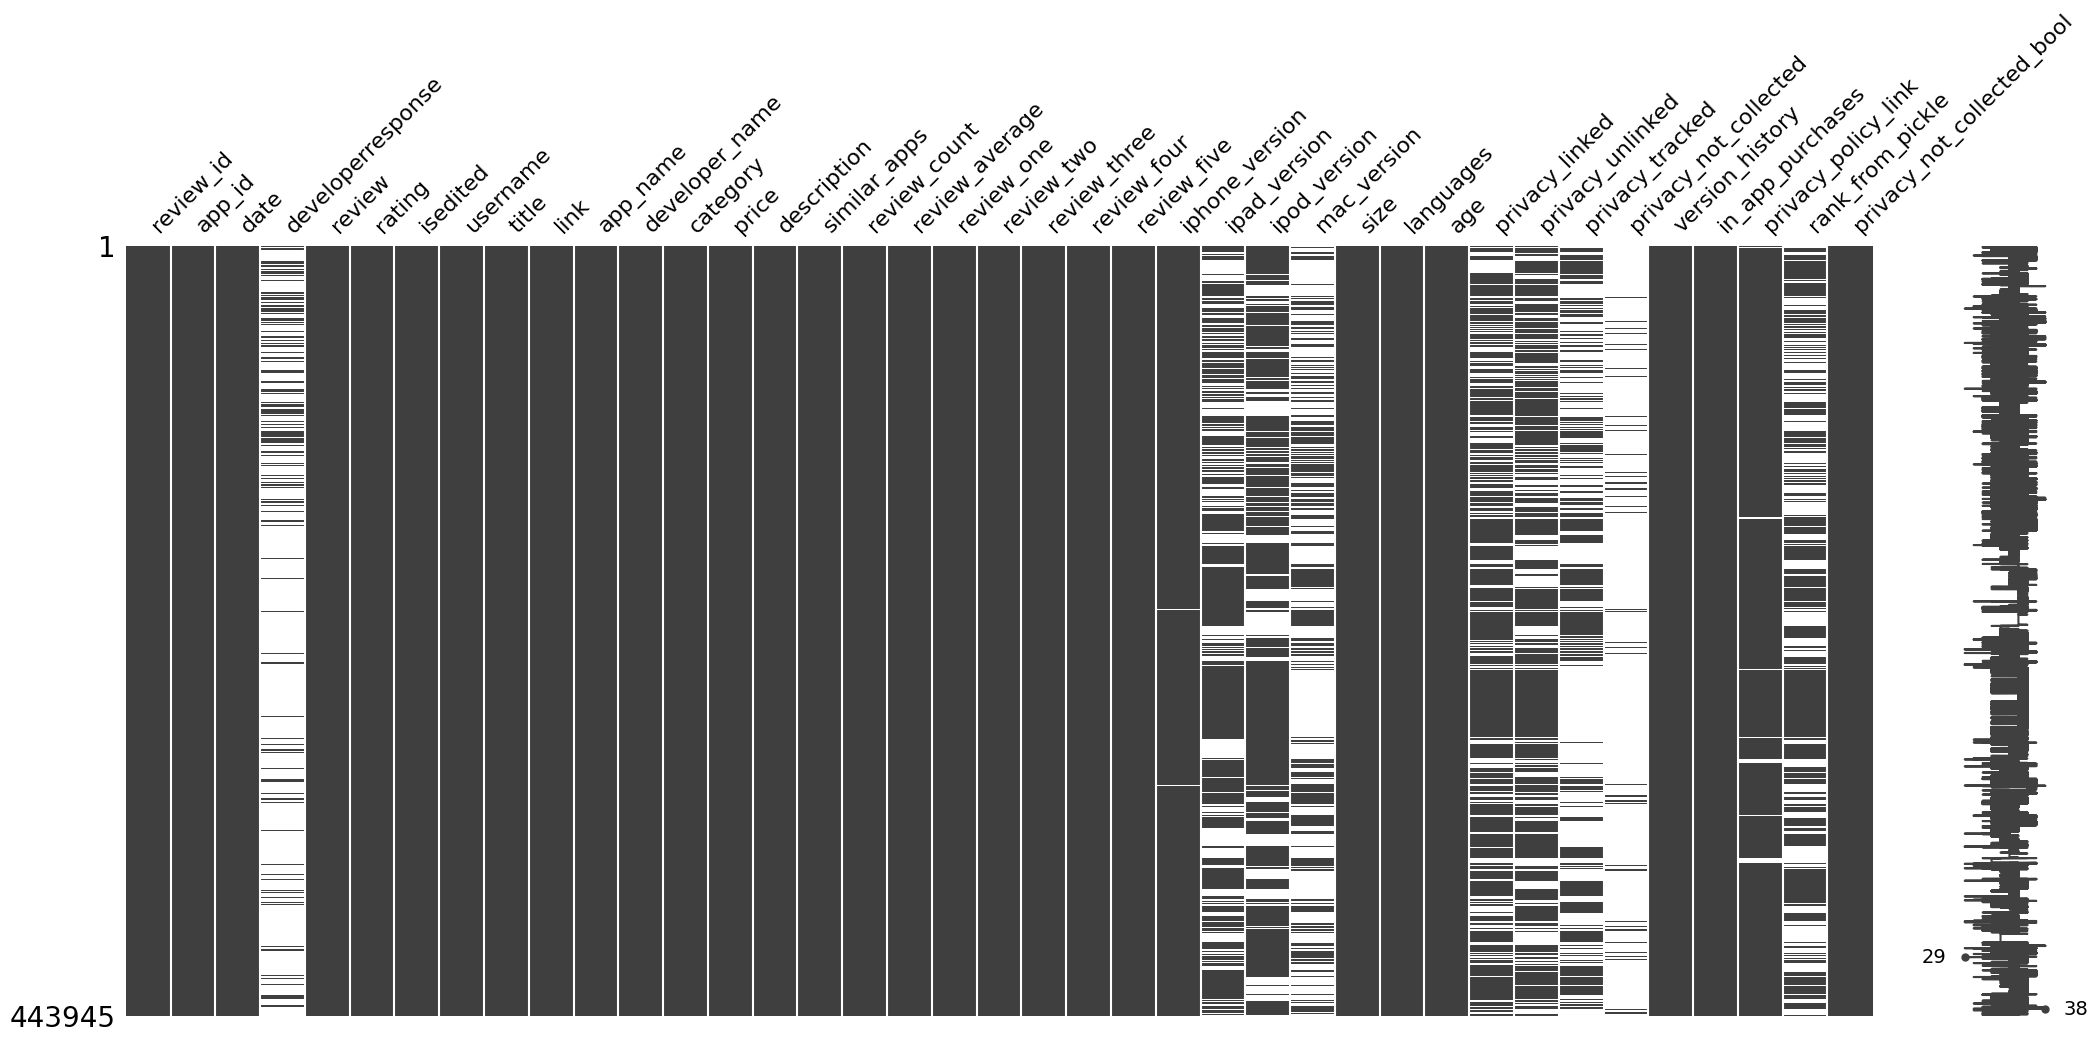

In [ ]:
# visualize missing data
import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(df)
plt.show()

## 3. Data Exploration

- Explore distributions of ratings, number of ratings, prices, categories, etc.
- Visualize relevant relationships (e.g., rating vs. price, rating vs. category).
- Use basic text mining on reviews: word frequencies, simple sentiment or topic structure.
- Create and justify **new features** that may help prediction (e.g., sentiment score, review length, price bins).
- Comment on what these patterns suggest about app quality.

In [ ]:
# 3. Data Exploration
# TODO: EDA plots and feature creation
import matplotlib.pyplot as plt

# Example placeholder:
# apps['log_ratings'] = np.log1p(apps['ratingCount'])
# apps['averageRating'].hist()
# plt.show()


## 4. Modeling Approach

### 4.1 Review Sentiment with Zero-/Few-Shot Learning (SetFit or alternative)

1. Define sentiment classes (e.g., positive / neutral / negative).
2. Manually label a small, balanced subset of reviews.
3. Fine-tune a SetFit model or a LLM model and evaluate performance.
5. Aggregate predicted sentiment to the **app level** (e.g., share of positive reviews).

These aggregated sentiment metrics will be used as features in Section 4.2.

In [ ]:
# 4.1 Sentiment Modeling
# TODO: Implement SetFit / alternative sentiment classifier and aggregate results
# Hint: start with a small labeled subset of reviews
pass


### 4.2 Predictive Modeling of App Quality

1. **Define the target** variable at app level (e.g., high_quality = 1 if avg rating ≥ threshold and sufficient rating count).
2. **Model A – Simple & interpretable:** Logistic Regression or a small Decision Tree.
3. **Model B – More powerful:** e.g., Random Forest or Gradient Boosting with basic hyperparameter tuning.
4. Compare performance (accuracy, precision, recall, F1, ROC-AUC, etc.) and comment on the trade-off between interpretability and performance.

In [ ]:
# 4.2 Predictive Modeling of App Quality
# TODO: Build train/test split, fit Model A and Model B, and evaluate
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Example placeholder:
# X = apps_model_features
# y = apps['high_quality']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# ...


## 5. Interpretation and Argumentation of Results

1. **Model Interpretation / Explainable AI**
- Inspect and visualize feature importance (e.g., SHAP values or model-specific importances).
- Discuss which features most strongly influence predicted app quality.

2. **Fairness & Bias Reflection**
- Where could sampling bias, measurement error, or missing data affect your results?
- Briefly relate your reflections to fairness notions mentioned in the course.

3. **LLM / SetFit as Method**
- Discuss where these methods might introduce bias or instability.
- Mention how sensitive your results are to label definitions or prompts (short reflection).

4. **Practical Insights for the Clinic**
- List 2–4 concrete, comprehensible recommendations that the mental health unit could use.
- Focus on what your results *suggest they should pay attention to* when recommending apps.

## 6. AI Tools and References

- Briefly describe where AI tools (e.g., ChatGPT, Copilot) were used, in line with FU guidelines.
- List key papers, blog posts, or documentation that you relied on for methods.
